In [1]:
import matplotlib.pyplot as plt
import numpy as np

from river.ensemble.amf import AMFRegressor

In [2]:
from river import stream
import numpy as np
from sklearn import datasets

In [3]:
X, y = datasets.make_regression(n_samples=500, n_features=1, noise=0.3)


In [4]:
total_samples = 500  # set the amount of samples to iterate through
proportion_training = 0.8  # proportion of training samples

train_samples = proportion_training * total_samples  # set the amount of learning samples
test_samples = (1 - proportion_training) * total_samples 

In [5]:
X_test, y_pred = [], []  # arrays for the plot

amf = AMFRegressor(n_estimators=10, step=1.0, use_aggregation=True, seed=None)

t = 0
for x_t, y_t in stream.iter_array(X, y):
    if t < train_samples:
        amf.learn_one(x_t, y_t)  # learning sample (x_t, y_t)
    else:
        pred = amf.predict_one(x_t)
        
        X_test.append(x_t)
        y_pred.append(pred)

    t += 1
    if t > total_samples:
        break

In [6]:
X_test_list = []
for i in X_test :
    X_test_list.append(list(i.values()))

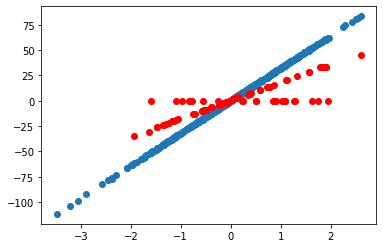

In [7]:
X, y = np.array(X), np.array(y)
X_test_list, y_pred = np.array(X_test_list), np.array(y_pred)
plt.scatter(X,y)
plt.scatter(X_test_list,y_pred, color = 'r')